In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pdb

In [26]:
n_hs = 512
base_path = "/home/aburak/Projects/rkn/"
fn = base_path + "hs_{:.0f}.out".format(n_hs)

In [27]:
n_epochs = -1
train_loss = np.array([])
train_acc = np.array([])
val_loss = np.array([])
val_acc = np.array([])
cur_lr = np.array([])
f = open(fn, "r")
for l in f:
    tmp = l.strip().split(" ")
    if tmp[0] == "Epoch":
        if n_epochs == -1:
            n_epochs = int(tmp[1].split("/")[1])
            train_loss = np.zeros((n_epochs,))
            train_acc = np.zeros((n_epochs,))
            val_loss = np.zeros((n_epochs,))
            val_acc = np.zeros((n_epochs,))
            cur_lr = np.zeros((n_epochs,))
        ind_epoch = int(tmp[1].split("/")[0]) - 1
        
        # dashes
        f.readline()
        
        # line regarding lr
        # pdb.set_trace()
        cur_lr[ind_epoch] = float(f.readline().strip().split(" ")[2])
        
        # line with 0.0
        f.readline()
        
        # line regarding the training
        tmp_tr = f.readline().strip().split(" ")
        train_loss[ind_epoch] = float(tmp_tr[2])
        train_acc[ind_epoch] = float(tmp_tr[4])
        
        # line regarding the validation
        tmp_val = f.readline().strip().split(" ")
        val_loss[ind_epoch] = float(tmp_val[2])
        val_acc[ind_epoch] = float(tmp_val[4])

## Loss

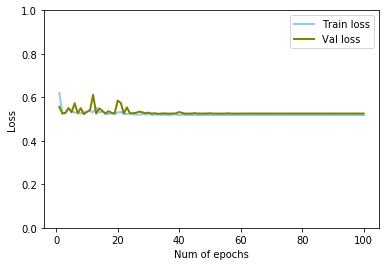

In [28]:
x_values = np.arange(1, 101, dtype=int)
fig = plt.figure()
plt.plot( x_values, train_loss, label="Train loss", color='skyblue', linewidth=2)
plt.plot( x_values, val_loss, label="Val loss", color='olive', linewidth=2)
plt.xlabel("Num of epochs")
plt.ylabel("Loss")
axes = plt.gca()
axes.set_ylim([0,1])
plt.legend()
plt.show()
fig.savefig("loss_{:.0f}".format(n_hs), dpi=1000)

## Accuracy

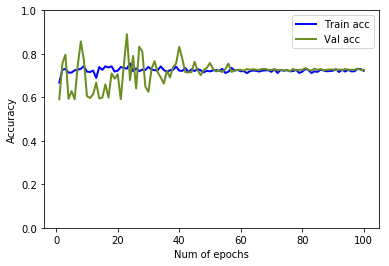

In [29]:
x_values = np.arange(1, 101, dtype=int)
fig = plt.figure()
plt.plot( x_values, train_acc, label="Train acc", color='blue', linewidth=2)
plt.plot( x_values, val_acc, label="Val acc", color='olivedrab', linewidth=2)
plt.xlabel("Num of epochs")
plt.ylabel("Accuracy")
axes = plt.gca()
axes.set_ylim([0,1])
plt.legend()
plt.show()
fig.savefig("acc_{:.0f}".format(n_hs), dpi=1000)